### Building a model to differentiate between muons and electrons from scratch

In this notebook, we will build a convolutional neural network to classify a signal as electron or muon. Therefore, we are facing a binary classification problem: electron or muon. This is the reason why we will have just one neuron in the output layer with sigmoidal activation.

First we import the training data stored in a file called `eVSmu_tr1.npz` and the testing data in `eVSmu_te1.npz`, both composed of two variables: 'data' for the numpy arrays with energy or noise, and 'labels' where 1 stands for electron signal and 0 for noise.

* [First model: 20 epochs](#First-model:-20-epochs)
* [Second model: one more layer](#Second-model:-one-more-layer)
* [Fourth model: dropout](#Fourth-model:-dropout)
* [Fifth model: one layer less, dropout](#Fifth-model:-one-layer-less,-dropout)
* [Sixth model: no layer, no dropout, more validation data](#Sixth-model:-no-layer,-no-dropout,-more-validation-data)
* [Ninth model: more drop out layers](#Ninth-model:-more-drop-out-layers)

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:

from sklearn.metrics import confusion_matrix
def plot_confusion_matrix(cm,
                          target_names,
                          title='Confusion matrix',
                          cmap=None,
                          normalize=True):
    """
    given a sklearn confusion matrix (cm), make a nice plot

    Arguments
    ---------
    cm:           confusion matrix from sklearn.metrics.confusion_matrix

    target_names: given classification classes such as [0, 1, 2]
                  the class names, for example: ['high', 'medium', 'low']

    title:        the text to display at the top of the matrix

    cmap:         the gradient of the values displayed from matplotlib.pyplot.cm
                  see http://matplotlib.org/examples/color/colormaps_reference.html
                  plt.get_cmap('jet') or plt.cm.Blues

    normalize:    If False, plot the raw numbers
                  If True, plot the proportions

    Usage
    -----
    plot_confusion_matrix(cm           = cm,                  # confusion matrix created by
                                                              # sklearn.metrics.confusion_matrix
                          normalize    = True,                # show proportions
                          target_names = y_labels_vals,       # list of names of the classes
                          title        = best_estimator_name) # title of graph

    Citiation
    ---------
    http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html

    """
    import matplotlib.pyplot as plt
    import numpy as np
    import itertools

    accuracy = np.trace(cm) / float(np.sum(cm))
    misclass = 1 - accuracy

    if cmap is None:
        cmap = plt.get_cmap('Blues')

    plt.figure(figsize=(8, 6))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()

    if target_names is not None:
        tick_marks = np.arange(len(target_names))
        plt.xticks(tick_marks, target_names, rotation=45)
        plt.yticks(tick_marks, target_names)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]


    thresh = cm.max() / 1.5 if normalize else cm.max() / 2
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        if normalize:
            plt.text(j, i, "{:0.4f}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")
        else:
            plt.text(j, i, "{:,}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")
    plt.grid(b=False)
    plt.xlim(-0.5, 1.5)
    plt.ylim(1.5, -0.5)
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label\naccuracy={:0.4f}; misclass={:0.4f}'.format(accuracy, misclass))
    plt.show()


In [3]:
loaded = np.load('/Users/Silvia/Desktop/TFM/e_VS_mu/eVSmu_tr1.npz')
X_train = loaded['data']
y_train = loaded['labels']

print(X_train.shape, y_train.shape)

(1600, 296, 286) (1600,)


In [4]:
loaded = np.load('/Users/Silvia/Desktop/TFM/e_VS_mu/eVSmu_te1.npz')
X_test = loaded['data_test']
y_test = loaded['labels_test']

print(X_test.shape, y_test.shape)

(858, 296, 286) (858,)


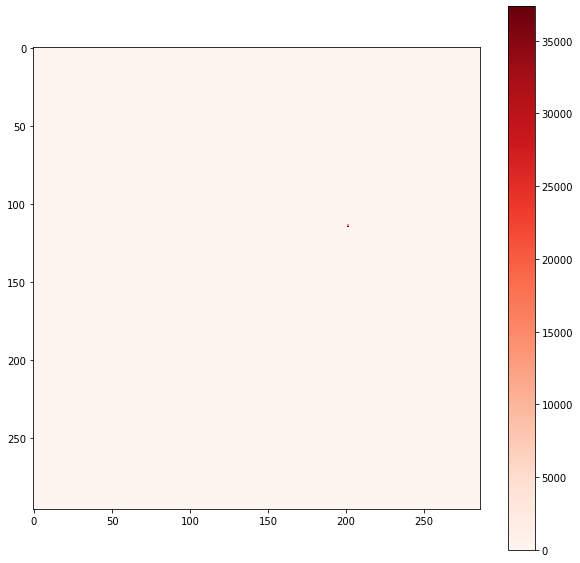

In [5]:
part = X_train[4]
plt.figure(figsize=(10,10))
plt.imshow(part, cmap='Reds')
plt.colorbar()

In [6]:
from sklearn import preprocessing

aux_train = X_train.reshape((X_train.shape[0], X_train.shape[1]* X_train.shape[2]))
aux_test = X_test.reshape((X_test.shape[0], X_test.shape[1]* X_test.shape[2]))

scaler = preprocessing.StandardScaler().fit(aux_train)

X_trainr = scaler.transform(aux_train)

X_testr = scaler.transform(aux_test)

print(X_trainr.shape, X_testr.shape)

(1600, 84656) (858, 84656)


In [7]:
X_train = X_trainr.reshape((X_train.shape[0], X_train.shape[1], X_train.shape[2], 1))

print(X_train.shape)

(1600, 296, 286, 1)


In [8]:
X_test = X_testr.reshape((X_test.shape[0], X_test.shape[1], X_test.shape[2], 1))

print(X_test.shape)

(858, 296, 286, 1)


In [9]:
window_y, window_x = 296,286

In [10]:
import keras
from keras import layers, models, optimizers

Using TensorFlow backend.


### First model: 20 epochs

In [17]:
model_v1 = models.Sequential()
model_v1.add(layers.Conv2D(32,(3,3), activation='relu', input_shape=(window_y, window_x, 1)))
model_v1.add(layers.MaxPooling2D((2,2)))
model_v1.add(layers.Conv2D(64,(3,3), activation='relu'))
model_v1.add(layers.MaxPooling2D((2,2)))
model_v1.add(layers.Conv2D(128,(3,3), activation='relu'))
model_v1.add(layers.MaxPooling2D((2,2)))
model_v1.add(layers.Conv2D(128,(3,3), activation='relu'))
model_v1.add(layers.MaxPooling2D((2,2)))

model_v1.add(layers.Flatten())
#model_v1.add(layers.Dense(units= 2050, activation='relu'))
model_v1.add(layers.Dense(units= 512, activation='relu'))
model_v1.add(layers.Dense(units= 1, activation='sigmoid'))
model_v1.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 294, 284, 32)      320       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 147, 142, 32)      0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 145, 140, 64)      18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 72, 70, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 70, 68, 128)       73856     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 35, 34, 128)       0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 33, 32, 128)      

In [18]:
model_v1.compile(optimizer=optimizers.RMSprop(lr= 1e-4),loss='binary_crossentropy', metrics=['acc'])

In [19]:
historyv1 =model_v1.fit(X_train, y_train, epochs= 20, validation_split = 0.2)

Train on 1280 samples, validate on 320 samples
Epoch 1/20
1280/1280 [==============================] - 81s 63ms/step - loss: 0.7137 - acc: 0.5961 - val_loss: 0.9035 - val_acc: 0.2313
Epoch 2/20
1280/1280 [==============================] - 80s 63ms/step - loss: 0.5407 - acc: 0.7367 - val_loss: 1.1675 - val_acc: 0.2313
Epoch 3/20
1280/1280 [==============================] - 83s 65ms/step - loss: 0.4342 - acc: 0.8000 - val_loss: 0.7296 - val_acc: 0.5938
Epoch 4/20
1280/1280 [==============================] - 82s 64ms/step - loss: 0.3294 - acc: 0.8609 - val_loss: 0.9509 - val_acc: 0.5781
Epoch 5/20
1280/1280 [==============================] - 82s 64ms/step - loss: 0.2382 - acc: 0.9094 - val_loss: 0.7546 - val_acc: 0.6687
Epoch 6/20
1280/1280 [==============================] - 83s 65ms/step - loss: 0.1695 - acc: 0.9344 - val_loss: 1.3474 - val_acc: 0.5875
Epoch 7/20
1280/1280 [==============================] - 81s 64ms/step - loss: 0.1168 - acc: 0.9641 - val_loss: 1.5637 - val_acc: 0.6000
E

In [20]:
model_v1.save('model_electron_or_muon_v1.h5')

In [21]:
loss, acc = model_v1.evaluate(X_test, y_test)
print('Accuracy with the model: {:5.2f}%'.format(100*acc))

858/858 [==============================] - 14s 17ms/step
Accuracy with the model: 69.35%


In [22]:
y_predicted1 = model_v1.predict(X_test)

In [24]:
y_predicted1[np.where(y_predicted1>=0.5)] = 1
y_predicted1[np.where(y_predicted1<0.5)] = 0

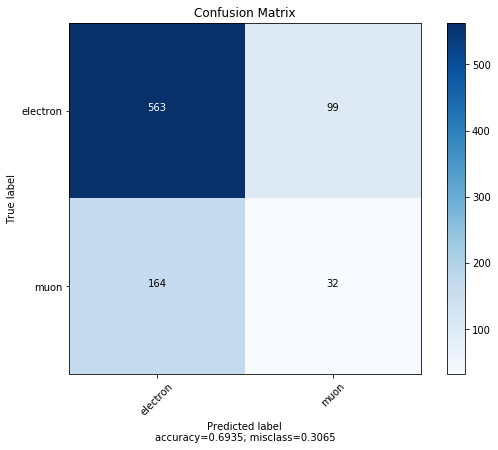

In [26]:
conf1 = confusion_matrix(y_test, y_predicted1, labels = list([0,1]))
plot_confusion_matrix(cm           = conf1, 
                      normalize    = False,
                      target_names = ['electron', 'muon'],
                      title        = "Confusion Matrix")

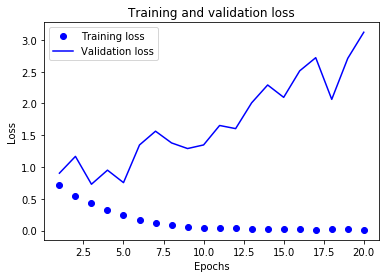

In [27]:
history_n1 = historyv1.history
loss_values_n1 = history_n1['loss']
val_loss_values_n1 = history_n1['val_loss']
epochs_n1 = range(1, len(loss_values_n1) + 1)
plt.plot(epochs_n1, loss_values_n1, 'bo', label='Training loss')
plt.plot(epochs_n1, val_loss_values_n1, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

### Second model: one more layer

In [28]:
model_v2 = models.Sequential()
model_v2.add(layers.Conv2D(32,(3,3), activation='relu', input_shape=(window_y, window_x, 1)))
model_v2.add(layers.MaxPooling2D((2,2)))
model_v2.add(layers.Conv2D(64,(3,3), activation='relu'))
model_v2.add(layers.MaxPooling2D((2,2)))
model_v2.add(layers.Conv2D(128,(3,3), activation='relu'))
model_v2.add(layers.MaxPooling2D((2,2)))
model_v2.add(layers.Conv2D(128,(3,3), activation='relu'))
model_v2.add(layers.MaxPooling2D((2,2)))

model_v2.add(layers.Flatten())
model_v2.add(layers.Dense(units= 2050, activation='relu'))
model_v2.add(layers.Dense(units= 512, activation='relu'))
model_v2.add(layers.Dense(units= 1, activation='sigmoid'))
model_v2.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 294, 284, 32)      320       
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 147, 142, 32)      0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 145, 140, 64)      18496     
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 72, 70, 64)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 70, 68, 128)       73856     
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 35, 34, 128)       0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 33, 32, 128)      

In [29]:
model_v2.compile(optimizer=optimizers.RMSprop(lr= 1e-4),loss='binary_crossentropy', metrics=['acc'])

In [30]:
historyv2 =model_v2.fit(X_train, y_train, epochs= 20, validation_split = 0.2)

Train on 1280 samples, validate on 320 samples
Epoch 1/20
1280/1280 [==============================] - 101s 79ms/step - loss: 0.7210 - acc: 0.6070 - val_loss: 0.6540 - val_acc: 0.5531
Epoch 2/20
1280/1280 [==============================] - 98s 77ms/step - loss: 0.5292 - acc: 0.7477 - val_loss: 0.9299 - val_acc: 0.4594
Epoch 3/20
1280/1280 [==============================] - 100s 78ms/step - loss: 0.3689 - acc: 0.8406 - val_loss: 0.6246 - val_acc: 0.6625
Epoch 4/20
1280/1280 [==============================] - 99s 77ms/step - loss: 0.2459 - acc: 0.9078 - val_loss: 0.7090 - val_acc: 0.7000
Epoch 5/20
1280/1280 [==============================] - 98s 77ms/step - loss: 0.1430 - acc: 0.9430 - val_loss: 0.9821 - val_acc: 0.6938
Epoch 6/20
1280/1280 [==============================] - 98s 77ms/step - loss: 0.0838 - acc: 0.9695 - val_loss: 1.1458 - val_acc: 0.7094
Epoch 7/20
1280/1280 [==============================] - 99s 77ms/step - loss: 0.0622 - acc: 0.9828 - val_loss: 2.0158 - val_acc: 0.6687

In [31]:
model_v2.save('model_electron_or_muon_v2.h5')

In [32]:
y_predicted2 = model_v2.predict(X_test)
y_predicted2[np.where(y_predicted2>=0.5)] = 1
y_predicted2[np.where(y_predicted2<0.5)] = 0

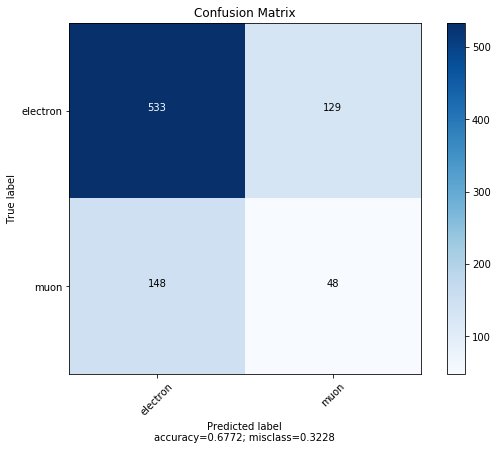

In [33]:
conf2 = confusion_matrix(y_test, y_predicted2, labels = list([0,1]))
plot_confusion_matrix(cm           = conf2, 
                      normalize    = False,
                      target_names = ['electron', 'muon'],
                      title        = "Confusion Matrix")

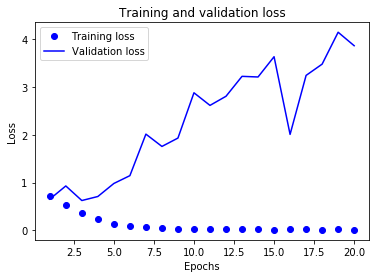

In [34]:
history_n1 = historyv2.history
loss_values_n1 = history_n1['loss']
val_loss_values_n1 = history_n1['val_loss']
epochs_n1 = range(1, len(loss_values_n1) + 1)
plt.plot(epochs_n1, loss_values_n1, 'bo', label='Training loss')
plt.plot(epochs_n1, val_loss_values_n1, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

### Third model: one more layer, dropout

In [35]:
model_v3 = models.Sequential()
model_v3.add(layers.Conv2D(32,(3,3), activation='relu', input_shape=(window_y, window_x, 1)))
model_v3.add(layers.MaxPooling2D((2,2)))
model_v3.add(layers.Conv2D(64,(3,3), activation='relu'))
model_v3.add(layers.MaxPooling2D((2,2)))
model_v3.add(layers.Conv2D(128,(3,3), activation='relu'))
model_v3.add(layers.MaxPooling2D((2,2)))
model_v3.add(layers.Conv2D(128,(3,3), activation='relu'))
model_v3.add(layers.MaxPooling2D((2,2)))

model_v3.add(layers.Flatten())
model_v3.add(layers.Dropout(0.5))
model_v3.add(layers.Dense(units= 2050, activation='relu'))
model_v3.add(layers.Dense(units= 512, activation='relu'))
model_v3.add(layers.Dense(units= 1, activation='sigmoid'))
model_v3.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_9 (Conv2D)            (None, 294, 284, 32)      320       
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 147, 142, 32)      0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 145, 140, 64)      18496     
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 72, 70, 64)        0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 70, 68, 128)       73856     
_________________________________________________________________
max_pooling2d_11 (MaxPooling (None, 35, 34, 128)       0         
_________________________________________________________________
conv2d_12 (Conv2D)           (None, 33, 32, 128)      

In [36]:
model_v3.compile(optimizer=optimizers.RMSprop(lr= 1e-4),loss='binary_crossentropy', metrics=['acc'])

In [37]:
historyv3 =model_v3.fit(X_train, y_train, epochs= 20, validation_split = 0.2)

Train on 1280 samples, validate on 320 samples
Epoch 1/20
1280/1280 [==============================] - 99s 77ms/step - loss: 0.7142 - acc: 0.5797 - val_loss: 1.0863 - val_acc: 0.1781
Epoch 2/20
1280/1280 [==============================] - 98s 77ms/step - loss: 0.5640 - acc: 0.7102 - val_loss: 0.7402 - val_acc: 0.5219
Epoch 3/20
1280/1280 [==============================] - 98s 77ms/step - loss: 0.4946 - acc: 0.7625 - val_loss: 1.0771 - val_acc: 0.4156
Epoch 4/20
1280/1280 [==============================] - 97s 76ms/step - loss: 0.4284 - acc: 0.8141 - val_loss: 1.0808 - val_acc: 0.4688
Epoch 5/20
1280/1280 [==============================] - 98s 77ms/step - loss: 0.3704 - acc: 0.8383 - val_loss: 0.8364 - val_acc: 0.5813
Epoch 6/20
1280/1280 [==============================] - 98s 77ms/step - loss: 0.3022 - acc: 0.8781 - val_loss: 0.8502 - val_acc: 0.6187
Epoch 7/20
1280/1280 [==============================] - 97s 76ms/step - loss: 0.2593 - acc: 0.8875 - val_loss: 1.0218 - val_acc: 0.6438
E

In [38]:
model_v3.save('model_electron_or_muon_v3.h5')

In [39]:
y_predicted3 = model_v3.predict(X_test)
y_predicted3[np.where(y_predicted3>=0.5)] = 1
y_predicted3[np.where(y_predicted3<0.5)] = 0

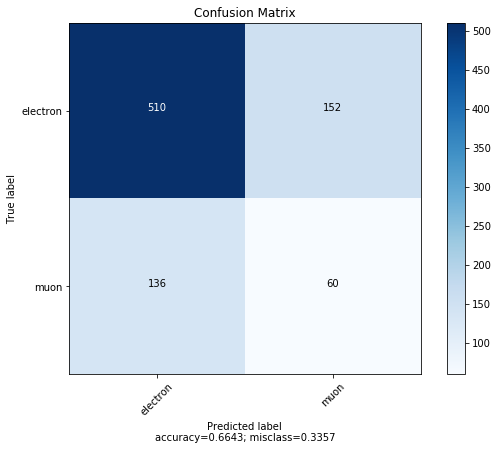

In [40]:
conf3 = confusion_matrix(y_test, y_predicted3, labels = list([0,1]))
plot_confusion_matrix(cm           = conf3, 
                      normalize    = False,
                      target_names = ['electron', 'muon'],
                      title        = "Confusion Matrix")

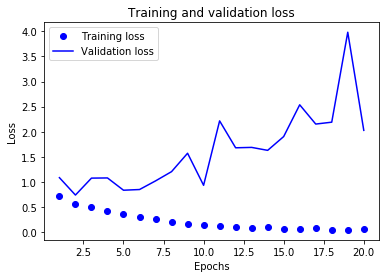

In [41]:
history_n1 = historyv3.history
loss_values_n1 = history_n1['loss']
val_loss_values_n1 = history_n1['val_loss']
epochs_n1 = range(1, len(loss_values_n1) + 1)
plt.plot(epochs_n1, loss_values_n1, 'bo', label='Training loss')
plt.plot(epochs_n1, val_loss_values_n1, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

### Forth model: less epochs, drop out

In [42]:
model_v4 = models.Sequential()
model_v4.add(layers.Conv2D(32,(3,3), activation='relu', input_shape=(window_y, window_x, 1)))
model_v4.add(layers.MaxPooling2D((2,2)))
model_v4.add(layers.Conv2D(64,(3,3), activation='relu'))
model_v4.add(layers.MaxPooling2D((2,2)))
model_v4.add(layers.Conv2D(128,(3,3), activation='relu'))
model_v4.add(layers.MaxPooling2D((2,2)))
model_v4.add(layers.Conv2D(128,(3,3), activation='relu'))
model_v4.add(layers.MaxPooling2D((2,2)))

model_v4.add(layers.Flatten())
model_v4.add(layers.Dropout(0.5))
model_v4.add(layers.Dense(units= 512, activation='relu'))
model_v4.add(layers.Dense(units= 1, activation='sigmoid'))
model_v4.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_13 (Conv2D)           (None, 294, 284, 32)      320       
_________________________________________________________________
max_pooling2d_13 (MaxPooling (None, 147, 142, 32)      0         
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 145, 140, 64)      18496     
_________________________________________________________________
max_pooling2d_14 (MaxPooling (None, 72, 70, 64)        0         
_________________________________________________________________
conv2d_15 (Conv2D)           (None, 70, 68, 128)       73856     
_________________________________________________________________
max_pooling2d_15 (MaxPooling (None, 35, 34, 128)       0         
_________________________________________________________________
conv2d_16 (Conv2D)           (None, 33, 32, 128)      

In [43]:
model_v4.compile(optimizer=optimizers.RMSprop(lr= 1e-4),loss='binary_crossentropy', metrics=['acc'])

In [44]:
historyv4 =model_v4.fit(X_train, y_train, epochs= 10, validation_split = 0.2)

Train on 1280 samples, validate on 320 samples
Epoch 1/10
1280/1280 [==============================] - 84s 66ms/step - loss: 0.7323 - acc: 0.5867 - val_loss: 0.7270 - val_acc: 0.4812
Epoch 2/10
1280/1280 [==============================] - 88s 69ms/step - loss: 0.5723 - acc: 0.7258 - val_loss: 1.4065 - val_acc: 0.1500
Epoch 3/10
1280/1280 [==============================] - 81s 63ms/step - loss: 0.5044 - acc: 0.7453 - val_loss: 0.9574 - val_acc: 0.4500
Epoch 4/10
1280/1280 [==============================] - 81s 63ms/step - loss: 0.4428 - acc: 0.7867 - val_loss: 0.9683 - val_acc: 0.4969
Epoch 5/10
1280/1280 [==============================] - 81s 63ms/step - loss: 0.3927 - acc: 0.8219 - val_loss: 1.0518 - val_acc: 0.4938
Epoch 6/10
1280/1280 [==============================] - 81s 64ms/step - loss: 0.3400 - acc: 0.8508 - val_loss: 1.0475 - val_acc: 0.5500
Epoch 7/10
1280/1280 [==============================] - 81s 63ms/step - loss: 0.2963 - acc: 0.8828 - val_loss: 0.7272 - val_acc: 0.6781
E

In [45]:
y_predicted4 = model_v4.predict(X_test)
y_predicted4[np.where(y_predicted4>=0.5)] = 1
y_predicted4[np.where(y_predicted4<0.5)] = 0

In [73]:
model_v4.save('model_electron_or_muon_v4.h5')

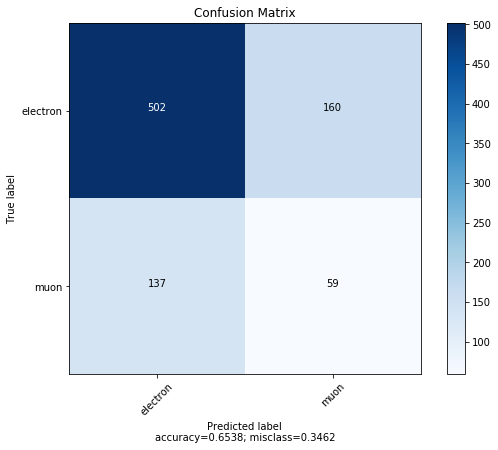

In [46]:
conf4 = confusion_matrix(y_test, y_predicted4, labels = list([0,1]))
plot_confusion_matrix(cm           = conf4, 
                      normalize    = False,
                      target_names = ['electron', 'muon'],
                      title        = "Confusion Matrix")

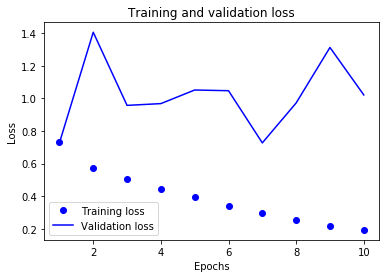

In [47]:
history_n1 = historyv4.history
loss_values_n1 = history_n1['loss']
val_loss_values_n1 = history_n1['val_loss']
epochs_n1 = range(1, len(loss_values_n1) + 1)
plt.plot(epochs_n1, loss_values_n1, 'bo', label='Training loss')
plt.plot(epochs_n1, val_loss_values_n1, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [48]:
model_v5 = models.Sequential()
model_v5.add(layers.Conv2D(32,(2,2), activation='relu', input_shape=(window_y, window_x, 1)))
model_v5.add(layers.MaxPooling2D((2,2)))
model_v5.add(layers.Conv2D(64,(3,3), activation='relu'))
model_v5.add(layers.MaxPooling2D((2,2)))
model_v5.add(layers.Conv2D(128,(3,3), activation='relu'))
model_v5.add(layers.MaxPooling2D((2,2)))
model_v5.add(layers.Conv2D(128,(3,3), activation='relu'))
model_v5.add(layers.MaxPooling2D((2,2)))

model_v5.add(layers.Flatten())
model_v5.add(layers.Dropout(0.5))
model_v5.add(layers.Dense(units= 512, activation='relu'))
model_v5.add(layers.Dense(units= 1, activation='sigmoid'))
model_v5.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_17 (Conv2D)           (None, 295, 285, 32)      160       
_________________________________________________________________
max_pooling2d_17 (MaxPooling (None, 147, 142, 32)      0         
_________________________________________________________________
conv2d_18 (Conv2D)           (None, 145, 140, 64)      18496     
_________________________________________________________________
max_pooling2d_18 (MaxPooling (None, 72, 70, 64)        0         
_________________________________________________________________
conv2d_19 (Conv2D)           (None, 70, 68, 128)       73856     
_________________________________________________________________
max_pooling2d_19 (MaxPooling (None, 35, 34, 128)       0         
_________________________________________________________________
conv2d_20 (Conv2D)           (None, 33, 32, 128)      

In [49]:
model_v5.compile(optimizer=optimizers.RMSprop(lr= 1e-4),loss='binary_crossentropy', metrics=['acc'])

In [50]:
historyv5 =model_v5.fit(X_train, y_train, epochs= 10, validation_split = 0.2)

Train on 1280 samples, validate on 320 samples
Epoch 1/10
1280/1280 [==============================] - 79s 62ms/step - loss: 0.7253 - acc: 0.6055 - val_loss: 0.7883 - val_acc: 0.3500
Epoch 2/10
1280/1280 [==============================] - 79s 62ms/step - loss: 0.5827 - acc: 0.7133 - val_loss: 0.7947 - val_acc: 0.4563
Epoch 3/10
1280/1280 [==============================] - 79s 62ms/step - loss: 0.5077 - acc: 0.7555 - val_loss: 0.9933 - val_acc: 0.3750
Epoch 4/10
1280/1280 [==============================] - 79s 62ms/step - loss: 0.4472 - acc: 0.7930 - val_loss: 0.9910 - val_acc: 0.4875
Epoch 5/10
1280/1280 [==============================] - 79s 62ms/step - loss: 0.3876 - acc: 0.8305 - val_loss: 0.6197 - val_acc: 0.6719
Epoch 6/10
1280/1280 [==============================] - 79s 62ms/step - loss: 0.3333 - acc: 0.8586 - val_loss: 0.8958 - val_acc: 0.5875
Epoch 7/10
1280/1280 [==============================] - 79s 62ms/step - loss: 0.2912 - acc: 0.8719 - val_loss: 0.6855 - val_acc: 0.6750
E

In [55]:
y_predicted5 = model_v5.predict(X_test)
y_predicted5[np.where(y_predicted5>=0.5)] = 1
y_predicted5[np.where(y_predicted5<0.5)] = 0

In [74]:
model_v5.save('model_electron_or_muon_v5.h5')

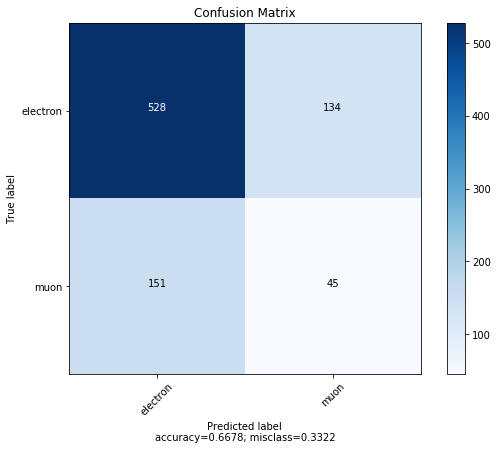

In [56]:
conf5 = confusion_matrix(y_test, y_predicted5, labels = list([0,1]))
plot_confusion_matrix(cm           = conf5, 
                      normalize    = False,
                      target_names = ['electron', 'muon'],
                      title        = "Confusion Matrix")

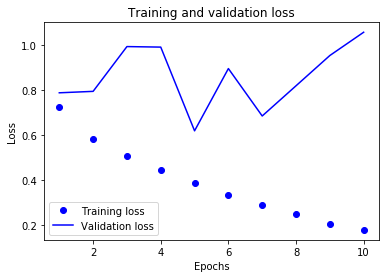

In [57]:
history_n1 = historyv5.history
loss_values_n1 = history_n1['loss']
val_loss_values_n1 = history_n1['val_loss']
epochs_n1 = range(1, len(loss_values_n1) + 1)
plt.plot(epochs_n1, loss_values_n1, 'bo', label='Training loss')
plt.plot(epochs_n1, val_loss_values_n1, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [58]:
model_v6 = models.Sequential()
model_v6.add(layers.Conv2D(32,(2,2), activation='relu', input_shape=(window_y, window_x, 1)))
model_v6.add(layers.MaxPooling2D((2,2)))
model_v6.add(layers.Conv2D(64,(3,3), activation='relu'))
model_v6.add(layers.MaxPooling2D((2,2)))
model_v6.add(layers.Conv2D(128,(3,3), activation='relu'))
model_v6.add(layers.MaxPooling2D((2,2)))
model_v6.add(layers.Conv2D(128,(3,3), activation='relu'))
model_v6.add(layers.MaxPooling2D((2,2)))

model_v6.add(layers.Flatten())
model_v6.add(layers.Dense(units= 512, activation='relu'))
model_v6.add(layers.Dense(units= 1, activation='sigmoid'))
model_v6.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_21 (Conv2D)           (None, 295, 285, 32)      160       
_________________________________________________________________
max_pooling2d_21 (MaxPooling (None, 147, 142, 32)      0         
_________________________________________________________________
conv2d_22 (Conv2D)           (None, 145, 140, 64)      18496     
_________________________________________________________________
max_pooling2d_22 (MaxPooling (None, 72, 70, 64)        0         
_________________________________________________________________
conv2d_23 (Conv2D)           (None, 70, 68, 128)       73856     
_________________________________________________________________
max_pooling2d_23 (MaxPooling (None, 35, 34, 128)       0         
_________________________________________________________________
conv2d_24 (Conv2D)           (None, 33, 32, 128)      

In [59]:
model_v6.compile(optimizer=optimizers.RMSprop(lr= 1e-4),loss='binary_crossentropy', metrics=['acc'])

In [60]:
historyv6 =model_v6.fit(X_train, y_train, epochs= 25, validation_split = 0.2)

Train on 1280 samples, validate on 320 samples
Epoch 1/25
1280/1280 [==============================] - 87s 68ms/step - loss: 0.7479 - acc: 0.6180 - val_loss: 0.7919 - val_acc: 0.3375
Epoch 2/25
1280/1280 [==============================] - 84s 66ms/step - loss: 0.5496 - acc: 0.7328 - val_loss: 0.8098 - val_acc: 0.4750
Epoch 3/25
1280/1280 [==============================] - 83s 65ms/step - loss: 0.4360 - acc: 0.8023 - val_loss: 0.7107 - val_acc: 0.5813
Epoch 4/25
1280/1280 [==============================] - 86s 67ms/step - loss: 0.3289 - acc: 0.8656 - val_loss: 0.9469 - val_acc: 0.5562
Epoch 5/25
1280/1280 [==============================] - 80s 63ms/step - loss: 0.2399 - acc: 0.9109 - val_loss: 0.6164 - val_acc: 0.7250
Epoch 6/25
1280/1280 [==============================] - 79s 61ms/step - loss: 0.1653 - acc: 0.9445 - val_loss: 0.7889 - val_acc: 0.7125
Epoch 7/25
1280/1280 [==============================] - 79s 61ms/step - loss: 0.1136 - acc: 0.9648 - val_loss: 1.0176 - val_acc: 0.7219
E

In [75]:
model_v6.save('model_electron_or_muon_v6.h5')

In [61]:
y_predicted6 = model_v6.predict(X_test)
y_predicted6[np.where(y_predicted6>=0.5)] = 1
y_predicted6[np.where(y_predicted6<0.5)] = 0

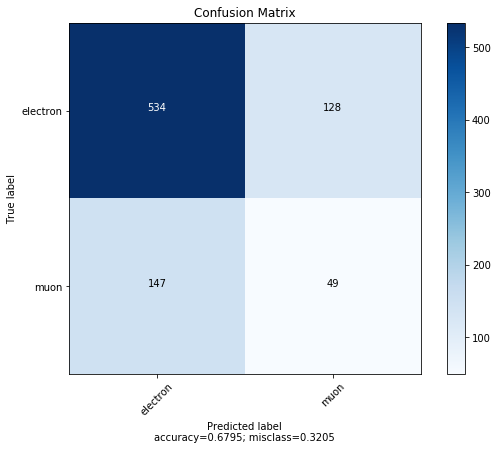

In [62]:
conf6 = confusion_matrix(y_test, y_predicted6, labels = list([0,1]))
plot_confusion_matrix(cm           = conf6, 
                      normalize    = False,
                      target_names = ['electron', 'muon'],
                      title        = "Confusion Matrix")

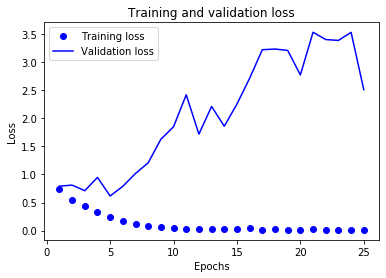

In [63]:
history_n1 = historyv6.history
loss_values_n1 = history_n1['loss']
val_loss_values_n1 = history_n1['val_loss']
epochs_n1 = range(1, len(loss_values_n1) + 1)
plt.plot(epochs_n1, loss_values_n1, 'bo', label='Training loss')
plt.plot(epochs_n1, val_loss_values_n1, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [64]:
model_v7 = models.Sequential()
model_v7.add(layers.Conv2D(32,(2,2), activation='relu', input_shape=(window_y, window_x, 1)))
model_v7.add(layers.MaxPooling2D((2,2)))
model_v7.add(layers.Conv2D(64,(3,3), activation='relu'))
model_v7.add(layers.MaxPooling2D((2,2)))
model_v7.add(layers.Conv2D(128,(3,3), activation='relu'))
model_v7.add(layers.MaxPooling2D((2,2)))
model_v7.add(layers.Conv2D(128,(3,3), activation='relu'))
model_v7.add(layers.MaxPooling2D((2,2)))

model_v7.add(layers.Flatten())
model_v7.add(layers.Dense(units= 2000, activation='relu'))
model_v7.add(layers.Dense(units= 512, activation='relu'))
model_v7.add(layers.Dense(units= 1, activation='sigmoid'))
model_v7.summary()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_25 (Conv2D)           (None, 295, 285, 32)      160       
_________________________________________________________________
max_pooling2d_25 (MaxPooling (None, 147, 142, 32)      0         
_________________________________________________________________
conv2d_26 (Conv2D)           (None, 145, 140, 64)      18496     
_________________________________________________________________
max_pooling2d_26 (MaxPooling (None, 72, 70, 64)        0         
_________________________________________________________________
conv2d_27 (Conv2D)           (None, 70, 68, 128)       73856     
_________________________________________________________________
max_pooling2d_27 (MaxPooling (None, 35, 34, 128)       0         
_________________________________________________________________
conv2d_28 (Conv2D)           (None, 33, 32, 128)      

In [65]:
model_v7.compile(optimizer=optimizers.RMSprop(lr= 1e-4),loss='binary_crossentropy', metrics=['acc'])

In [66]:
historyv7 =model_v7.fit(X_train, y_train, epochs= 25, validation_split = 0.2)

Train on 1280 samples, validate on 320 samples
Epoch 1/25
1280/1280 [==============================] - 100s 78ms/step - loss: 0.7408 - acc: 0.5875 - val_loss: 0.7444 - val_acc: 0.4406
Epoch 2/25
1280/1280 [==============================] - 100s 78ms/step - loss: 0.5316 - acc: 0.7617 - val_loss: 0.9256 - val_acc: 0.4344
Epoch 3/25
1280/1280 [==============================] - 101s 79ms/step - loss: 0.3704 - acc: 0.8383 - val_loss: 0.7344 - val_acc: 0.6531
Epoch 4/25
1280/1280 [==============================] - 100s 78ms/step - loss: 0.2468 - acc: 0.9039 - val_loss: 0.8337 - val_acc: 0.6750
Epoch 5/25
1280/1280 [==============================] - 108s 84ms/step - loss: 0.1394 - acc: 0.9492 - val_loss: 1.0595 - val_acc: 0.6812
Epoch 6/25
1280/1280 [==============================] - 102s 80ms/step - loss: 0.0849 - acc: 0.9695 - val_loss: 0.9516 - val_acc: 0.7844
Epoch 7/25
1280/1280 [==============================] - 106s 83ms/step - loss: 0.0604 - acc: 0.9789 - val_loss: 1.4894 - val_acc: 0

In [67]:
y_predicted7 = model_v7.predict(X_test)
y_predicted7[np.where(y_predicted7>=0.5)] = 1
y_predicted7[np.where(y_predicted7<0.5)] = 0

In [76]:
model_v7.save('model_electron_or_muon_v7.h5')

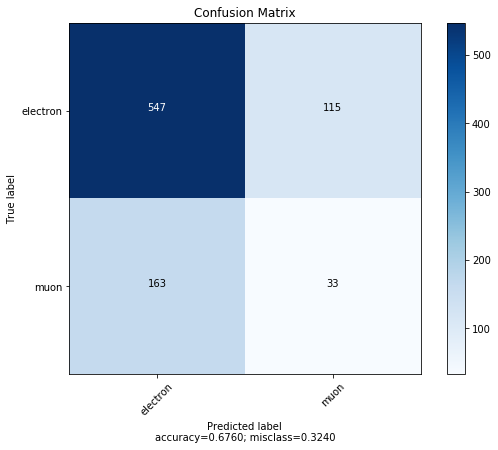

In [68]:
conf7 = confusion_matrix(y_test, y_predicted7, labels = list([0,1]))
plot_confusion_matrix(cm           = conf7, 
                      normalize    = False,
                      target_names = ['electron', 'muon'],
                      title        = "Confusion Matrix")

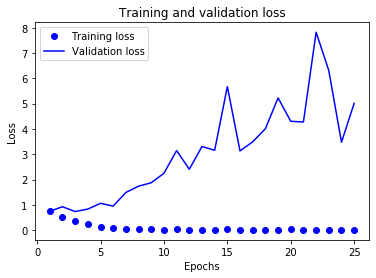

In [69]:
history_n1 = historyv7.history
loss_values_n1 = history_n1['loss']
val_loss_values_n1 = history_n1['val_loss']
epochs_n1 = range(1, len(loss_values_n1) + 1)
plt.plot(epochs_n1, loss_values_n1, 'bo', label='Training loss')
plt.plot(epochs_n1, val_loss_values_n1, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [70]:
model_v8 = models.Sequential()
model_v8.add(layers.Conv2D(32,(2,2), activation='relu', input_shape=(window_y, window_x, 1)))
model_v8.add(layers.MaxPooling2D((2,2)))
model_v8.add(layers.Conv2D(64,(3,3), activation='relu'))
model_v8.add(layers.MaxPooling2D((2,2)))
model_v8.add(layers.Conv2D(128,(3,3), activation='relu'))
model_v8.add(layers.MaxPooling2D((2,2)))
model_v8.add(layers.Conv2D(128,(3,3), activation='relu'))
model_v8.add(layers.MaxPooling2D((2,2)))

model_v8.add(layers.Flatten())
model_v8.add(layers.Dense(units= 2000, activation='relu'))
model_v8.add(layers.Dense(units= 1000, activation='relu'))
model_v8.add(layers.Dense(units= 512, activation='relu'))
model_v8.add(layers.Dense(units= 1, activation='sigmoid'))
model_v8.summary()

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_29 (Conv2D)           (None, 295, 285, 32)      160       
_________________________________________________________________
max_pooling2d_29 (MaxPooling (None, 147, 142, 32)      0         
_________________________________________________________________
conv2d_30 (Conv2D)           (None, 145, 140, 64)      18496     
_________________________________________________________________
max_pooling2d_30 (MaxPooling (None, 72, 70, 64)        0         
_________________________________________________________________
conv2d_31 (Conv2D)           (None, 70, 68, 128)       73856     
_________________________________________________________________
max_pooling2d_31 (MaxPooling (None, 35, 34, 128)       0         
_________________________________________________________________
conv2d_32 (Conv2D)           (None, 33, 32, 128)      

In [71]:
model_v8.compile(optimizer=optimizers.RMSprop(lr= 1e-4),loss='binary_crossentropy', metrics=['acc'])

In [72]:
historyv8 =model_v8.fit(X_train, y_train, epochs= 25, validation_split = 0.2)

Train on 1280 samples, validate on 320 samples
Epoch 1/25
1280/1280 [==============================] - 96s 75ms/step - loss: 0.7029 - acc: 0.5992 - val_loss: 0.7879 - val_acc: 0.2969
Epoch 2/25
1280/1280 [==============================] - 96s 75ms/step - loss: 0.5420 - acc: 0.7320 - val_loss: 0.6939 - val_acc: 0.6094
Epoch 3/25
1280/1280 [==============================] - 96s 75ms/step - loss: 0.3845 - acc: 0.8336 - val_loss: 0.6424 - val_acc: 0.6594
Epoch 4/25
1280/1280 [==============================] - 96s 75ms/step - loss: 0.2609 - acc: 0.8922 - val_loss: 0.9842 - val_acc: 0.6250
Epoch 5/25
1280/1280 [==============================] - 96s 75ms/step - loss: 0.1537 - acc: 0.9367 - val_loss: 0.8554 - val_acc: 0.7188
Epoch 6/25
1280/1280 [==============================] - 96s 75ms/step - loss: 0.0889 - acc: 0.9695 - val_loss: 1.0649 - val_acc: 0.7563
Epoch 7/25
1280/1280 [==============================] - 96s 75ms/step - loss: 0.0535 - acc: 0.9820 - val_loss: 1.1742 - val_acc: 0.7781
E

In [77]:
model_v8.save('model_electron_or_muon_v8.h5')

In [78]:
y_predicted8 = model_v8.predict(X_test)
y_predicted8[np.where(y_predicted8>=0.5)] = 1
y_predicted8[np.where(y_predicted8<0.5)] = 0

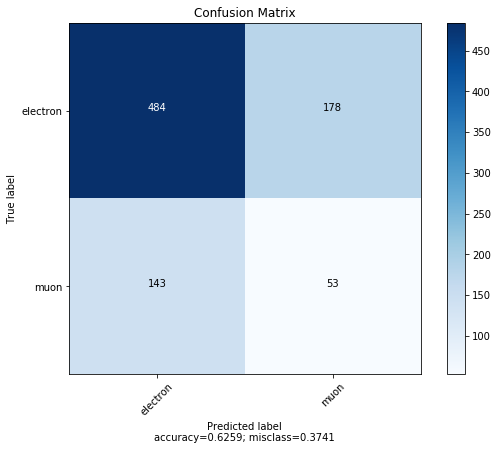

In [79]:
conf8 = confusion_matrix(y_test, y_predicted8, labels = list([0,1]))
plot_confusion_matrix(cm           = conf8, 
                      normalize    = False,
                      target_names = ['electron', 'muon'],
                      title        = "Confusion Matrix")

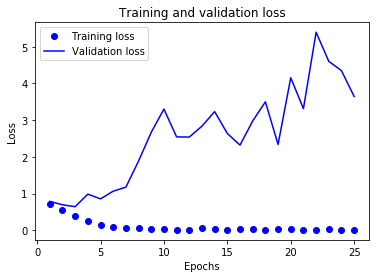

In [80]:
history_n1 = historyv8.history
loss_values_n1 = history_n1['loss']
val_loss_values_n1 = history_n1['val_loss']
epochs_n1 = range(1, len(loss_values_n1) + 1)
plt.plot(epochs_n1, loss_values_n1, 'bo', label='Training loss')
plt.plot(epochs_n1, val_loss_values_n1, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

### Ninth model: more drop out layers

In [11]:
model_v9 = models.Sequential()
model_v9.add(layers.Conv2D(32,(3,3), activation='relu', input_shape=(window_y, window_x, 1)))
model_v9.add(layers.MaxPooling2D((2,2)))
model_v9.add(layers.Dropout((0.25)))

model_v9.add(layers.Conv2D(64,(3,3), activation='relu'))
model_v9.add(layers.MaxPooling2D((2,2)))
model_v9.add(layers.Dropout((0.25)))

model_v9.add(layers.Conv2D(128,(3,3), activation='relu'))
model_v9.add(layers.MaxPooling2D((2,2)))
model_v9.add(layers.Dropout((0.25)))

model_v9.add(layers.Conv2D(128,(3,3), activation='relu'))
model_v9.add(layers.MaxPooling2D((2,2)))
model_v9.add(layers.Dropout((0.25)))

model_v9.add(layers.Flatten())
model_v9.add(layers.Dense(units= 512, activation='relu'))
model_v9.add(layers.Dense(units= 1, activation='sigmoid'))
model_v9.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 294, 284, 32)      320       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 147, 142, 32)      0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 147, 142, 32)      0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 145, 140, 64)      18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 72, 70, 64)        0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 72, 70, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 70, 68, 128)      

In [12]:
model_v9.compile(optimizer=optimizers.RMSprop(lr= 1e-4),loss='binary_crossentropy', metrics=['acc'])

In [13]:
historyv9 =model_v9.fit(X_train, y_train, epochs= 35, validation_split = 0.2)

Train on 1280 samples, validate on 320 samples
Epoch 1/35
1280/1280 [==============================] - 89s 70ms/step - loss: 0.7366 - acc: 0.6031 - val_loss: 0.8289 - val_acc: 0.1281
Epoch 2/35
1280/1280 [==============================] - 87s 68ms/step - loss: 0.5956 - acc: 0.7008 - val_loss: 0.9071 - val_acc: 0.2188
Epoch 3/35
1280/1280 [==============================] - 88s 69ms/step - loss: 0.5369 - acc: 0.7430 - val_loss: 0.7155 - val_acc: 0.4875
Epoch 4/35
1280/1280 [==============================] - 86s 67ms/step - loss: 0.5065 - acc: 0.7648 - val_loss: 0.8088 - val_acc: 0.3781
Epoch 5/35
1280/1280 [==============================] - 84s 65ms/step - loss: 0.4757 - acc: 0.7625 - val_loss: 0.6806 - val_acc: 0.5625
Epoch 6/35
1280/1280 [==============================] - 88s 69ms/step - loss: 0.4503 - acc: 0.7906 - val_loss: 0.8114 - val_acc: 0.4719
Epoch 7/35
1280/1280 [==============================] - 86s 67ms/step - loss: 0.4114 - acc: 0.8102 - val_loss: 0.6633 - val_acc: 0.5719
E

In [14]:
model_v9.save('model_electron_or_muon_v9.h5')

In [15]:
loss, acc = model_v9.evaluate(X_test, y_test)
print('Accuracy with the model: {:5.2f}%'.format(100*acc))

858/858 [==============================] - 14s 17ms/step
Accuracy with the model: 67.02%


In [18]:
y_predicted9 = model_v9.predict(X_test)
y_predicted9[np.where(y_predicted9>=0.5)] = 1
y_predicted9[np.where(y_predicted9<0.5)] = 0

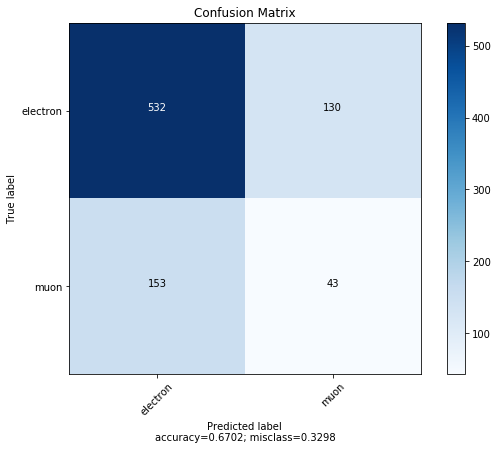

In [19]:
conf9 = confusion_matrix(y_test, y_predicted9, labels = list([0,1]))
plot_confusion_matrix(cm           = conf9, 
                      normalize    = False,
                      target_names = ['electron', 'muon'],
                      title        = "Confusion Matrix")

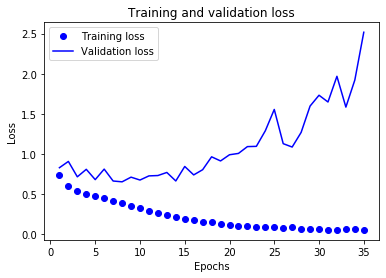

In [20]:
history_n1 = historyv9.history
loss_values_n1 = history_n1['loss']
val_loss_values_n1 = history_n1['val_loss']
epochs_n1 = range(1, len(loss_values_n1) + 1)
plt.plot(epochs_n1, loss_values_n1, 'bo', label='Training loss')
plt.plot(epochs_n1, val_loss_values_n1, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [17]:
model_v10 = models.Sequential()
model_v10.add(layers.Conv2D(32,(3,3), activation='relu', input_shape=(window_y, window_x, 1)))
model_v10.add(layers.MaxPooling2D((2,2)))
model_v10.add(layers.Dropout((0.25)))

model_v10.add(layers.Conv2D(32,(3,3), activation='relu'))
model_v10.add(layers.MaxPooling2D((2,2)))
model_v10.add(layers.Dropout((0.25)))

model_v10.add(layers.Conv2D(64,(3,3), activation='relu'))
model_v10.add(layers.MaxPooling2D((2,2)))
model_v10.add(layers.Dropout((0.25)))

model_v10.add(layers.Conv2D(128,(3,3), activation='relu'))
model_v10.add(layers.MaxPooling2D((2,2)))
model_v10.add(layers.Dropout((0.25)))

model_v10.add(layers.Conv2D(128,(3,3), activation='relu'))
model_v10.add(layers.MaxPooling2D((2,2)))
model_v10.add(layers.Dropout((0.25)))

model_v10.add(layers.Flatten())
model_v10.add(layers.Dense(units= 512, activation='relu'))
model_v10.add(layers.Dropout((0.5)))
model_v10.add(layers.Dense(units= 1, activation='sigmoid'))
model_v10.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_16 (Conv2D)           (None, 294, 284, 32)      320       
_________________________________________________________________
max_pooling2d_16 (MaxPooling (None, 147, 142, 32)      0         
_________________________________________________________________
dropout_20 (Dropout)         (None, 147, 142, 32)      0         
_________________________________________________________________
conv2d_17 (Conv2D)           (None, 145, 140, 32)      9248      
_________________________________________________________________
max_pooling2d_17 (MaxPooling (None, 72, 70, 32)        0         
_________________________________________________________________
dropout_21 (Dropout)         (None, 72, 70, 32)        0         
_________________________________________________________________
conv2d_18 (Conv2D)           (None, 70, 68, 64)       

In [18]:
model_v10.compile(optimizer=optimizers.RMSprop(lr= 1e-3),loss='binary_crossentropy', metrics=['acc'])

In [19]:
historyv10 =model_v10.fit(X_train, y_train, epochs= 35, validation_split = 0.2)

Train on 1280 samples, validate on 320 samples
Epoch 1/35
1280/1280 [==============================] - 57s 45ms/step - loss: 0.7635 - acc: 0.6375 - val_loss: 0.9169 - val_acc: 0.2000
Epoch 2/35
1280/1280 [==============================] - 58s 45ms/step - loss: 0.6145 - acc: 0.6875 - val_loss: 1.1398 - val_acc: 0.0938
Epoch 3/35
1280/1280 [==============================] - 58s 45ms/step - loss: 0.5989 - acc: 0.6828 - val_loss: 1.0856 - val_acc: 0.0969
Epoch 4/35
1280/1280 [==============================] - 57s 45ms/step - loss: 0.5804 - acc: 0.7094 - val_loss: 1.1479 - val_acc: 0.0875
Epoch 5/35
1280/1280 [==============================] - 57s 45ms/step - loss: 0.5656 - acc: 0.7156 - val_loss: 0.9647 - val_acc: 0.2031
Epoch 6/35
1280/1280 [==============================] - 57s 45ms/step - loss: 0.5298 - acc: 0.7500 - val_loss: 1.1476 - val_acc: 0.1875
Epoch 7/35
1280/1280 [==============================] - 58s 45ms/step - loss: 0.5267 - acc: 0.7586 - val_loss: 1.1294 - val_acc: 0.1781
E

In [20]:
model_v10.save('model_electron_or_muon_v10.h5')

In [21]:
loss, acc = model_v10.evaluate(X_test, y_test)
print('Accuracy with the model: {:5.2f}%'.format(100*acc))

858/858 [==============================] - 10s 11ms/step
Accuracy with the model: 74.24%


In [22]:
y_predicted10 = model_v10.predict(X_test)
y_predicted10[np.where(y_predicted10>=0.5)] = 1
y_predicted10[np.where(y_predicted10<0.5)] = 0

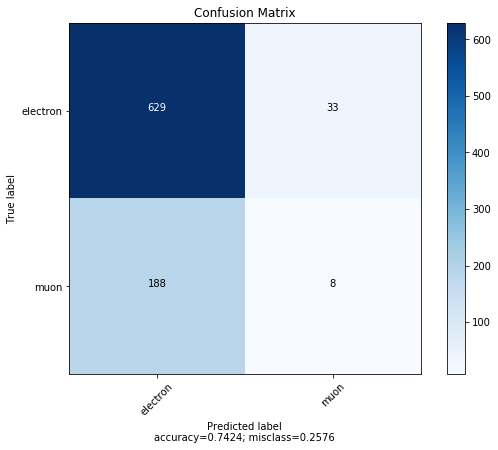

In [23]:
conf10 = confusion_matrix(y_test, y_predicted10, labels = list([0,1]))
plot_confusion_matrix(cm           = conf10, 
                      normalize    = False,
                      target_names = ['electron', 'muon'],
                      title        = "Confusion Matrix")

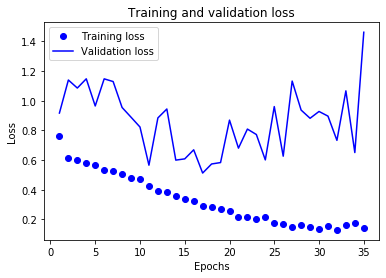

In [24]:
history_n1 = historyv10.history
loss_values_n1 = history_n1['loss']
val_loss_values_n1 = history_n1['val_loss']
epochs_n1 = range(1, len(loss_values_n1) + 1)
plt.plot(epochs_n1, loss_values_n1, 'bo', label='Training loss')
plt.plot(epochs_n1, val_loss_values_n1, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [43]:
model_v11 = models.Sequential()
model_v11.add(layers.Conv2D(32,(3,3), activation='relu', input_shape=(window_y, window_x, 1)))
model_v11.add(layers.MaxPooling2D((2,2)))
model_v11.add(layers.Dropout((0.25)))

model_v11.add(layers.Conv2D(32,(3,3), activation='relu'))
model_v11.add(layers.MaxPooling2D((2,2)))
model_v11.add(layers.Dropout((0.25)))

model_v11.add(layers.Conv2D(64,(3,3), activation='relu'))
model_v11.add(layers.MaxPooling2D((2,2)))
model_v11.add(layers.Dropout((0.25)))

model_v11.add(layers.Conv2D(128,(3,3), activation='relu'))
model_v11.add(layers.MaxPooling2D((2,2)))
model_v11.add(layers.Dropout((0.25)))

model_v11.add(layers.Conv2D(128,(3,3), activation='relu'))
model_v11.add(layers.MaxPooling2D((2,2)))
model_v11.add(layers.Dropout((0.25)))

model_v11.add(layers.Flatten())
model_v11.add(layers.Dense(units= 712, activation='relu'))
model_v11.add(layers.Dropout((0.5)))
model_v11.add(layers.Dense(units= 1, activation='sigmoid'))
model_v11.summary()

Model: "sequential_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_38 (Conv2D)           (None, 294, 284, 32)      320       
_________________________________________________________________
max_pooling2d_37 (MaxPooling (None, 147, 142, 32)      0         
_________________________________________________________________
dropout_45 (Dropout)         (None, 147, 142, 32)      0         
_________________________________________________________________
conv2d_39 (Conv2D)           (None, 145, 140, 32)      9248      
_________________________________________________________________
max_pooling2d_38 (MaxPooling (None, 72, 70, 32)        0         
_________________________________________________________________
dropout_46 (Dropout)         (None, 72, 70, 32)        0         
_________________________________________________________________
conv2d_40 (Conv2D)           (None, 70, 68, 64)      

In [44]:
model_v11.compile(optimizer=optimizers.RMSprop(lr= 1e-2),loss='binary_crossentropy', metrics=['acc'])

In [45]:
historyv11 =model_v11.fit(X_train, y_train, epochs= 35, validation_split = 0.2)

Train on 1280 samples, validate on 320 samples
Epoch 1/35
1280/1280 [==============================] - 61s 47ms/step - loss: 0.8192 - acc: 0.5586 - val_loss: 0.6653 - val_acc: 0.5250
Epoch 2/35
1280/1280 [==============================] - 59s 46ms/step - loss: 0.6863 - acc: 0.6328 - val_loss: 0.7129 - val_acc: 0.3938
Epoch 3/35
1280/1280 [==============================] - 56s 44ms/step - loss: 0.6490 - acc: 0.6734 - val_loss: 0.7412 - val_acc: 0.3125
Epoch 4/35
1280/1280 [==============================] - 60s 47ms/step - loss: 0.6182 - acc: 0.6883 - val_loss: 0.7697 - val_acc: 0.2719
Epoch 5/35
1280/1280 [==============================] - 62s 48ms/step - loss: 0.5898 - acc: 0.7078 - val_loss: 0.8086 - val_acc: 0.3000
Epoch 6/35
1280/1280 [==============================] - 60s 47ms/step - loss: 0.5740 - acc: 0.7203 - val_loss: 0.8084 - val_acc: 0.3000
Epoch 7/35
1280/1280 [==============================] - 63s 50ms/step - loss: 0.5757 - acc: 0.7219 - val_loss: 0.8908 - val_acc: 0.2125
E

In [46]:
model_v11.save('model_electron_or_muon_v11.h5')

In [47]:
loss, acc = model_v11.evaluate(X_test, y_test)
print('Accuracy with the model: {:5.2f}%'.format(100*acc))

858/858 [==============================] - 9s 10ms/step
Accuracy with the model: 60.96%


In [48]:
y_predicted11 = model_v11.predict(X_test)
y_predicted11[np.where(y_predicted11>=0.5)] = 1
y_predicted11[np.where(y_predicted11<0.5)] = 0

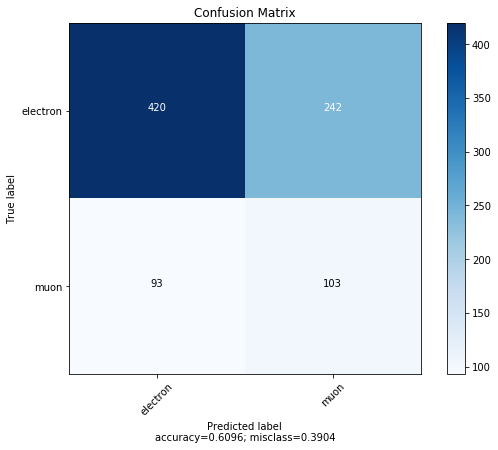

In [49]:
conf11 = confusion_matrix(y_test, y_predicted11, labels = list([0,1]))
plot_confusion_matrix(cm           = conf11, 
                      normalize    = False,
                      target_names = ['electron', 'muon'],
                      title        = "Confusion Matrix")

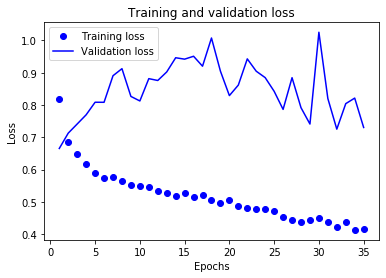

In [50]:
history_n1 = historyv11.history
loss_values_n1 = history_n1['loss']
val_loss_values_n1 = history_n1['val_loss']
epochs_n1 = range(1, len(loss_values_n1) + 1)
plt.plot(epochs_n1, loss_values_n1, 'bo', label='Training loss')
plt.plot(epochs_n1, val_loss_values_n1, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()